# Analysis of the time series data

In [22]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [6]:
df_long = gpd.read_file(
    "data/timeseries/trees_ndvi_weather_water_long.gpkg",
    layer="trees"
)
df_long.head(5)

,pitid,month,art_bot,art_gruppe,baumhoehe,bezirk,gattung,has_watering,kronedurch,pflanzjahr,stammumfg,NDVI,water,temp,precip,geometry
0,00008100:000c09d7,3,Crataegus laevigata 'Paul´s Scarlet',Laubbäume,7.0,Charlottenburg-Wilmersdorf,CRATAEGUS,True,4.0,1991,40.0,0.224754,0.0,4.441935,2.2,POINT (13.29195 52.50365)
1,00008100:000c09e9,3,Crataegus laevigata 'Paul´s Scarlet',Laubbäume,7.0,Charlottenburg-Wilmersdorf,CRATAEGUS,True,4.0,2001,45.0,0.157686,0.0,4.441935,2.2,POINT (13.29324 52.50396)
2,00008100:000c09ea,3,Crataegus laevigata 'Paul´s Scarlet',Laubbäume,7.0,Charlottenburg-Wilmersdorf,CRATAEGUS,True,4.0,1991,60.0,0.180522,0.0,4.441935,2.2,POINT (13.29334 52.50397)
3,00008100:000c0a20,3,Ginkgo biloba,Nadelbäume,12.0,Charlottenburg-Wilmersdorf,GINKGO,True,2.0,1990,52.0,0.309235,0.0,4.441935,2.2,POINT (13.28022 52.51082)
4,00008100:000c0a21,3,Ginkgo biloba,Nadelbäume,9.0,Charlottenburg-Wilmersdorf,GINKGO,True,3.0,1992,50.0,0.352739,0.0,4.441935,2.2,POINT (13.28009 52.51081)


In [12]:
df_long.isna().mean()[["NDVI", "water", "temp", "precip"]]
df_long.groupby("month")["water"].describe()


,count,mean,std,min,25%,50%,75%,max
month,,,,,,,,
3,1948.0,0.012834,0.566429,0.0,0.0,0.0,0.0,25.0
4,1948.0,3.211499,15.294420,0.0,0.0,0.0,0.0,220.0
5,1948.0,15.748973,48.466352,0.0,0.0,0.0,0.0,545.0
6,1948.0,21.306982,66.254178,0.0,0.0,0.0,0.0,1116.0
7,1948.0,27.066735,78.034369,0.0,0.0,0.0,0.0,1146.0
8,1948.0,31.327515,86.685444,0.0,0.0,0.0,18.0,1700.0
9,1948.0,4.967659,29.510847,0.0,0.0,0.0,0.0,400.0


In [13]:
monthly_means = (
    df_long
    .groupby("month")[["water", "precip", "temp", "NDVI"]]
    .mean()
    .reset_index()
)

monthly_means


,month,water,precip,temp,NDVI
0,3,0.012834,2.2,4.441935,0.315893
1,4,3.211499,38.0,8.153333,0.353909
2,5,15.748973,50.1,15.516129,0.546199
3,6,21.306982,35.1,19.970000,0.560773
4,7,27.066735,44.9,20.251613,0.532271
5,8,31.327515,63.4,21.754839,0.508457
6,9,4.967659,50.9,13.720000,0.560291


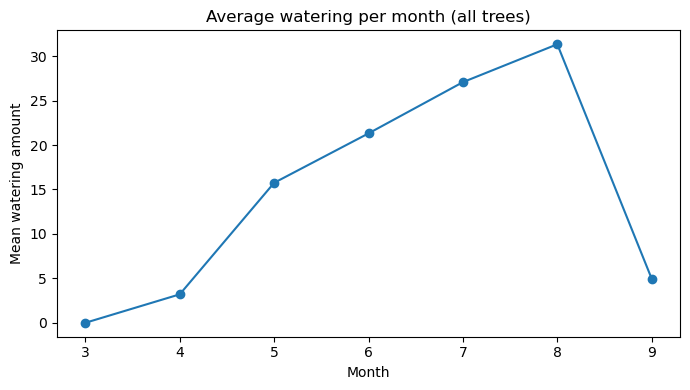

In [15]:
plt.figure(figsize=(7, 4))
plt.plot(monthly_means["month"], monthly_means["water"], marker="o")
plt.xlabel("Month")
plt.ylabel("Mean watering amount")
plt.title("Average watering per month (all trees)")
plt.xticks(monthly_means["month"])
plt.tight_layout()
plt.show()

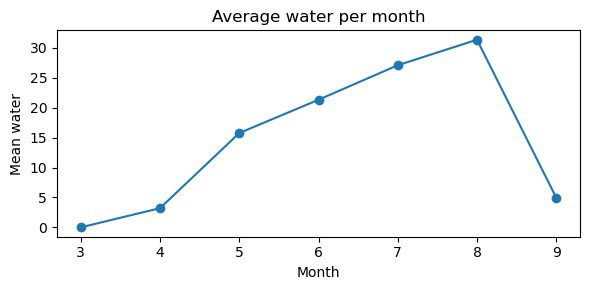

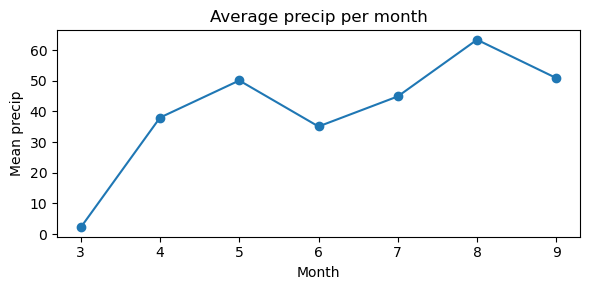

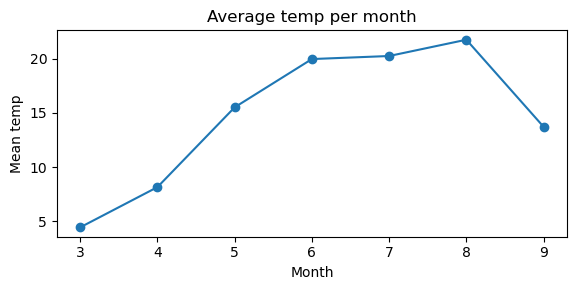

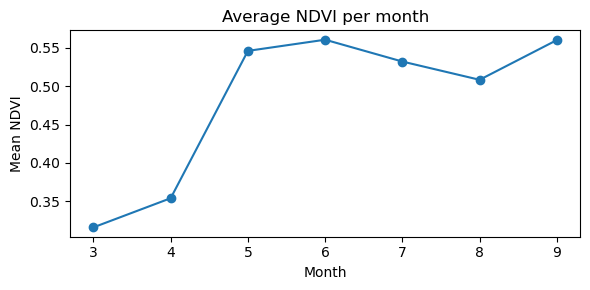

In [16]:
vars_to_plot = ["water", "precip", "temp", "NDVI"]

for v in vars_to_plot:
    plt.figure(figsize=(6, 3))
    plt.plot(monthly_means["month"], monthly_means[v], marker="o")
    plt.xlabel("Month")
    plt.ylabel(f"Mean {v}")
    plt.title(f"Average {v} per month")
    plt.xticks(monthly_means["month"])
    plt.tight_layout()
    plt.show()


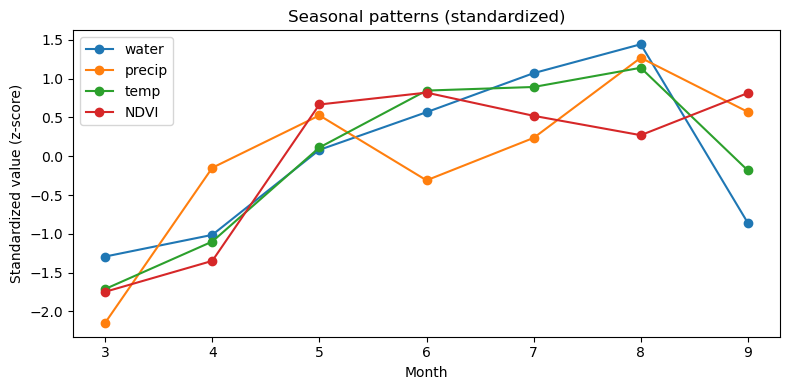

In [18]:
scaled = monthly_means.copy()
scaled[["water", "precip", "temp", "NDVI"]] = (
    StandardScaler()
    .fit_transform(scaled[["water", "precip", "temp", "NDVI"]])
)

plt.figure(figsize=(8, 4))
for v in ["water", "precip", "temp", "NDVI"]:
    plt.plot(scaled["month"], scaled[v], marker="o", label=v)

plt.xlabel("Month")
plt.ylabel("Standardized value (z-score)")
plt.title("Seasonal patterns (standardized)")
plt.xticks(scaled["month"])
plt.legend()
plt.tight_layout()
plt.show()


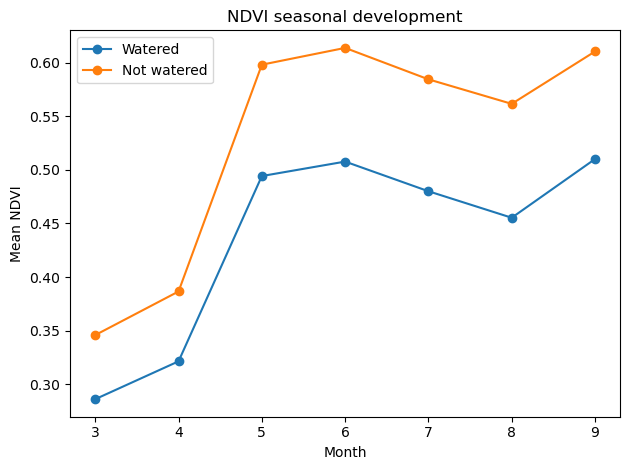

In [19]:
monthly_means_watering = (
    df_long
    .groupby(["has_watering", "month"])[["water", "NDVI"]]
    .mean()
    .reset_index()
)

for status, label in [(True, "Watered"), (False, "Not watered")]:
    subset = monthly_means_watering[
        monthly_means_watering["has_watering"] == status
    ]
    plt.plot(subset["month"], subset["NDVI"], marker="o", label=label)

plt.xlabel("Month")
plt.ylabel("Mean NDVI")
plt.title("NDVI seasonal development")
plt.legend()
plt.tight_layout()
plt.show()


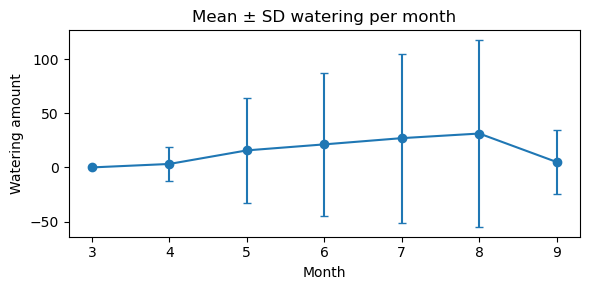

In [20]:
monthly_stats = (
    df_long
    .groupby("month")["water"]
    .agg(["mean", "std"])
    .reset_index()
)

plt.figure(figsize=(6, 3))
plt.errorbar(
    monthly_stats["month"],
    monthly_stats["mean"],
    yerr=monthly_stats["std"],
    marker="o",
    capsize=3
)
plt.xlabel("Month")
plt.ylabel("Watering amount")
plt.title("Mean ± SD watering per month")
plt.tight_layout()
plt.show()


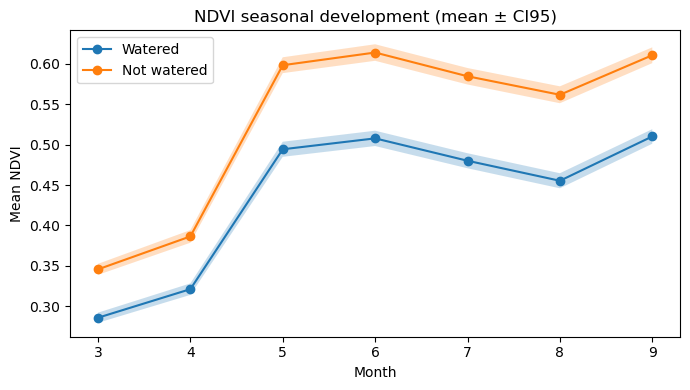

In [26]:
monthly_stats = (
    df_long
    .groupby(["has_watering", "month"])["NDVI"]
    .agg(
        mean="mean",
        std="std",
        n="count"
    )
    .reset_index()
)

monthly_stats["se"] = monthly_stats["std"] / np.sqrt(monthly_stats["n"])
# 95% confidence interval
monthly_stats["ci95"] = 1.96 * monthly_stats["se"]

plt.figure(figsize=(7, 4))

for status, label in [(True, "Watered"), (False, "Not watered")]:
    subset = monthly_stats[monthly_stats["has_watering"] == status]
    
    # mean line
    plt.plot(
        subset["month"],
        subset["mean"],
        marker="o",
        label=label
    )
    
    # uncertainty tube
    plt.fill_between(
        subset["month"],
        subset["mean"] - subset["ci95"],
        subset["mean"] + subset["ci95"],
        alpha=0.25
    )

plt.xlabel("Month")
plt.ylabel("Mean NDVI")
plt.title("NDVI seasonal development (mean ± CI95)")
plt.xticks(sorted(df_long["month"].unique()))
plt.legend()
plt.tight_layout()
plt.show()

## Correlation Analysis
For the correlation analysis, only NDVI-watering was done monthly as the values per tree are different for the watering.
Temperature and precipitation are mean values for Berlin for each month and therefore don't have variance over the different trees per month --> no correlation possible.

In [ ]:
# for all trees ignoring the months
df_long[["NDVI", "temp", "precip", "water"]].corr(method="pearson")


,NDVI,temp,precip,water
NDVI,1.000000,0.447926,0.380263,-0.021088
temp,0.447926,1.000000,0.741293,0.190294
precip,0.380263,0.741293,1.000000,0.126940
water,-0.021088,0.190294,0.126940,1.000000


In [27]:
corr_water_by_month = (
    df_long
    .groupby("month")
    .apply(lambda x: x["NDVI"].corr(x["water"]))
    .reset_index(name="corr_ndvi_water")
)

corr_water_by_month

/var/folders/_d/r6vqd8xn11sb_7lc0mrn4bcr0000gn/T/ipykernel_37314/1487972053.py:4: FutureWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(lambda x: x["NDVI"].corr(x["water"]))


,month,corr_ndvi_water
0,3,0.008184
1,4,-0.065353
2,5,-0.116129
3,6,-0.108307
4,7,-0.121096
5,8,-0.148457
6,9,-0.083157


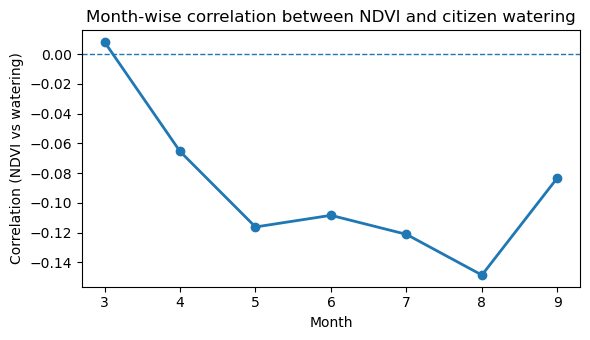

In [29]:
plt.figure(figsize=(6, 3.5))

plt.plot(
    corr_water_by_month["month"],
    corr_water_by_month["corr_ndvi_water"],
    marker="o",
    linewidth=2
)

plt.axhline(0, linestyle="--", linewidth=1)

plt.xlabel("Month")
plt.ylabel("Correlation (NDVI vs watering)")
plt.title("Month-wise correlation between NDVI and citizen watering")
plt.xticks(corr_water_by_month["month"])
plt.tight_layout()
plt.show()

In [33]:
def bootstrap_corr(x, y, n=1000):
    rng = np.random.default_rng()
    corrs = []

    for _ in range(n):
        idx = rng.integers(0, len(x), len(x))
        xs, ys = x[idx], y[idx]

        # skip zero-variance samples
        if np.std(xs) == 0 or np.std(ys) == 0:
            continue

        corrs.append(np.corrcoef(xs, ys)[0, 1])

    return np.array(corrs)

ci_list = []

for m, g in df_long.groupby("month"):
    boot = bootstrap_corr(
        g["NDVI"].values,
        g["water"].values
    )

    ci_list.append({
        "month": m,
        "corr": g["NDVI"].corr(g["water"]),
        "low": np.percentile(boot, 2.5),
        "high": np.percentile(boot, 97.5),
        "n_boot": len(boot)
    })

corr_ci = pd.DataFrame(ci_list)

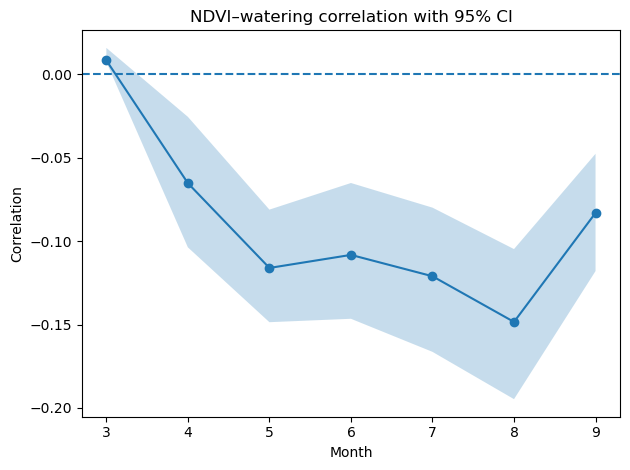

In [34]:
plt.plot(corr_ci["month"], corr_ci["corr"], marker="o")
plt.fill_between(corr_ci["month"], corr_ci["low"], corr_ci["high"], alpha=0.25)
plt.axhline(0, linestyle="--")
plt.xlabel("Month")
plt.ylabel("Correlation")
plt.title("NDVI–watering correlation with 95% CI")
plt.tight_layout()
plt.show()

In [35]:
# lagged correlation
df_long = df_long.sort_values(["pitid", "month"])

df_long["water_lag1"] = (
    df_long.groupby("pitid")["water"].shift(1)
)

df_long[["NDVI", "water_lag1"]].corr()

,NDVI,water_lag1
NDVI,1.000000,-0.049231
water_lag1,-0.049231,1.000000


In [36]:
import statsmodels.formula.api as smf

model = smf.ols(
    "NDVI ~ water_lag1 + temp + precip + C(month)",
    data=df_long.dropna()
).fit()

model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   NDVI   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.184
Method:                 Least Squares   F-statistic:                     428.2
Date:                Tue, 20 Jan 2026   Prob (F-statistic):               0.00
Time:                        11:54:12   Log-Likelihood:                 5011.9
No. Observations:               11400   AIC:                        -1.001e+04
Df Residuals:                   11393   BIC:                            -9958.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         0.0625      0.003     21.600      0.000       0.057       0.068
C(month)[T.5]     0.0372      0.004      9.449      0.000       0.030       0.045
C(month)[T.6]     0.0690      0.003     24.556      0.000       0.064       0.075
C(month)[T.7]    -0.0092      0.003     -3.059      0.002      -0.015      -0.003
C(month)[T.8]    -0.1407      0.003    -48.425      0.000      -0.146      -0.135
C(month)[T.9]     0.0787      0.004     17.649      0.000       0.070       0.087
water_lag1       -0.0003    2.5e-05    -11.507      0.000      -0.000      -0.000
temp              0.0132      0.000     29.112      0.000       0.012       0.014
precip            0.0048      0.000     35.230      0.000       0.005       0.005
==============================================================================
Omnibus:                      480.689   Durbin-Watson:                   0.336
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.970
Skew:                          -0.053   Prob(JB):                     1.14e-45
Kurtosis:                       2.348   Cond. No.                     2.84e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.01e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [28]:
n_per_month = (
    df_long
    .groupby("month")["NDVI"]
    .count()
    .reset_index(name="n_trees")
)

corr_water_by_month = corr_water_by_month.merge(n_per_month, on="month")


In [10]:
ndvi_season = (
    df_long
    .groupby(["has_watering", "month"])["NDVI"]
    .mean()
    .reset_index()
)


In [11]:
df_long.groupby("has_watering")[["NDVI", "water", "temp", "precip"]].corr()


NDVI     water      temp    precip
has_watering                                               
False        NDVI    1.000000       NaN  0.487177  0.411950
             water        NaN       NaN       NaN       NaN
             temp    0.487177       NaN  1.000000  0.741293
             precip  0.411950       NaN  0.741293  1.000000
True         NDVI    1.000000  0.075314  0.438968  0.374495
             water   0.075314  1.000000  0.278858  0.186019
             temp    0.438968  0.278858  1.000000  0.741293
             precip  0.374495  0.186019  0.741293  1.000000